In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import dask.dataframe as dd

# PANDAS EDA

In [95]:
### FIND PERCENTAGE NULL IN FIELDS BY YEAR AND WRITE OUTPUT TO A TXT FILE

#open path to a txt file
f = open("../data/descriptive.txt","w+")

#iterate through year
for i in range(2007, 2019):
    
    #read df and use only relevant fields
    df = pd.read_parquet(f'../data/y{i}')
    df = df[['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m',
                       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal',
                       'revol_bal_joint', 'revol_util', 'sec_app_chargeoff_within_12_mths', 
                       'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high',
                       'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
                       'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'all_util']]

    

    

In [96]:
### FIND PERCENTAGE NULL IN FIELDS BY YEAR AND WRITE OUTPUT TO A TXT FILE

#open path to a txt file
f = open("../data/descriptive_all.txt","w+")

#iterate through year
for i in range(2007, 2019):
    
    #read df and use only relevant fields
    df = pd.read_parquet(f'../data/y{i}')
#     df = df[['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m',
#                        'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal',
#                        'revol_bal_joint', 'revol_util', 'sec_app_chargeoff_within_12_mths', 
#                        'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high',
#                        'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 
#                        'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'all_util']]

    
    # Write output
    f.write(f'=====YEAR: {i}=====\n')
    for col in df.columns:
        pct = sum(df[col].isna())/len(df) * 100
        if pct <=
        f.write('Name: %s ' % col)
        f.write(f'Percentage null: %s\n' % pct)
        
    f.write('\n')

f.close()

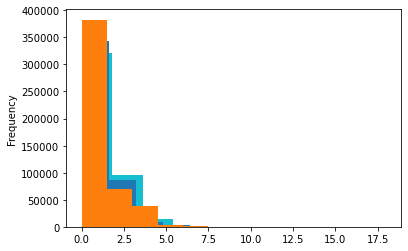

In [69]:
# open_acc_6m

pdf = matplotlib.backends.backend_pdf.PdfPages("../data/open_acc_6m_plots.pdf")

fig_list = []
for i in range(2007, 2019):
    df = pd.read_parquet(f'../data/y{i}')
    df = df[['open_acc_6m']]
    figure = df.open_acc_6m.plot(kind='hist').figure
    fig_list.append(figure)

for fig in fig_list:
    pdf.savefig(fig)

pdf.close()

# DASK EDA

In [2]:
accepted_data = dd.read_csv('../data/accepted_2007_to_2018Q4.csv', dtype={'sec_app_earliest_cr_line':'object',
                                                                      'id':'object',
                                                                      'desc':'object'}, low_memory=False)

In [9]:
accepted_data = accepted_data[accepted_data.issue_d.notnull()]

In [13]:
accepted_data.issue_d = accepted_data.issue_d.map_partitions(pd.to_datetime, meta=('issue_d', 'datetime64[ns]'))

In [21]:
columns = ['acc_now_delinq','acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint',
           'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
           'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 
           'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high',
           'fico_range_low', 'grade', 'home_ownership', 'id', 'il_util', 'initial_list_status', 
           'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'int_rate', 'loan_amnt', 'loan_status', 'max_bal_bc',
           'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
           'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il',
           'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
           'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 
           'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
           'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
           'open_acc', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m',
           'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal',
           'revol_bal_joint', 'revol_util', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med',
           'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths',
           'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc',
           'sec_app_open_act_il', 'sec_app_revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt',
           'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 
           'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verification_status', 
           'verification_status_joint', 'zip_code']

In [22]:
inception_time = []
for col in columns:
    df = accepted_data[[col, 'issue_d']][accepted_data[col].notnull()]
    inception_time.append({'col': col, 'min_date': min(df.issue_d), 'max_date': max(df.issue_d)})
    print(col, 'done.')

acc_now_delinq done.
acc_open_past_24mths done.
addr_state done.
all_util done.
annual_inc done.
annual_inc_joint done.
application_type done.
avg_cur_bal done.
bc_open_to_buy done.
bc_util done.
chargeoff_within_12_mths done.
collections_12_mths_ex_med done.
delinq_2yrs done.
delinq_amnt done.
desc done.
disbursement_method done.
dti done.
dti_joint done.
earliest_cr_line done.
emp_length done.
emp_title done.
fico_range_high done.
fico_range_low done.
grade done.
home_ownership done.
id done.
il_util done.
initial_list_status done.
inq_fi done.
inq_last_12m done.
inq_last_6mths done.
int_rate done.
loan_amnt done.
loan_status done.
max_bal_bc done.
mo_sin_old_il_acct done.
mo_sin_old_rev_tl_op done.
mo_sin_rcnt_rev_tl_op done.
mo_sin_rcnt_tl done.
mort_acc done.
mths_since_last_delinq done.
mths_since_last_major_derog done.
mths_since_last_record done.
mths_since_rcnt_il done.
mths_since_recent_bc done.
mths_since_recent_bc_dlq done.
mths_since_recent_inq done.
mths_since_recent_revo

In [24]:
inceptionDF = pd.DataFrame(inception_time)

In [27]:
inceptionDF.to_csv('../data/inception_date.csv')

## Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc84df4880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc84df4d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc6668af40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc84dec3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc84dec700>],
 'means': []}

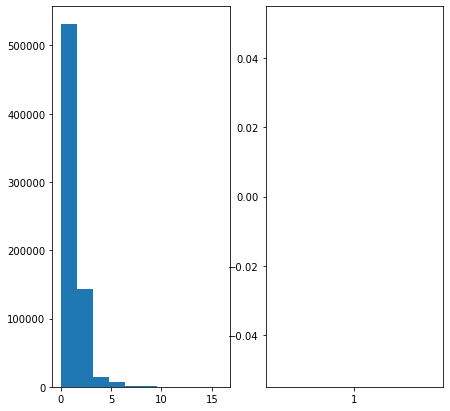

In [90]:
# open_acc_6m
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))
axes[0].hist(accepted_data.open_acc_6m.compute().sample(frac=0.5, replace=False))
axes[1].boxplot(data=accepted_data.open_acc_6m.compute().sample(frac=0.5, replace=False))
#accepted_data.open_acc_6m.compute().sample(frac=0.5, replace=False).plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc6487fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc66488400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc6487f9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc66488ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc66488e20>],
 'means': []}

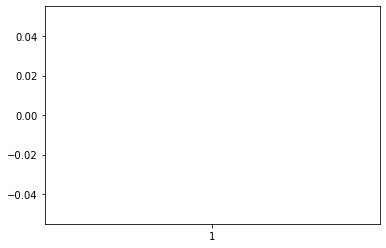

In [94]:
plt.boxplot(accepted_data.open_acc_6m.compute().sample(frac=0.5, replace=False))

<AxesSubplot:ylabel='Frequency'>

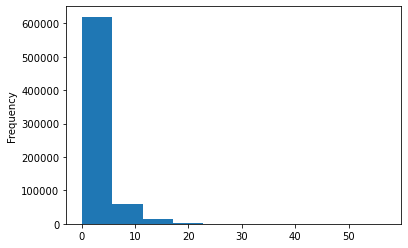

In [79]:
# open_act_il
accepted_data.open_act_il.compute().sample(frac=0.5, replace=False).plot(kind='hist')

In [ ]:
# open_il_12m
accepted_data.open_il_12m.compute().sample(frac=0.5, replace=False).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

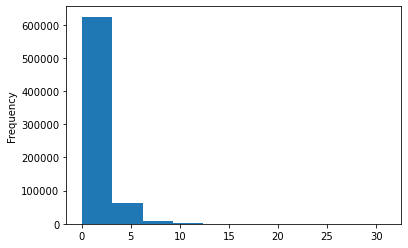

In [80]:
# open_il_24m
accepted_data.open_il_24m.compute().sample(frac=0.5, replace=False).plot(kind='hist')

In [ ]:
# open_rv_12m
accepted_data.open_rv_12m.compute().sample(frac=0.5, replace=False).plot(kind='hist')

In [ ]:
# open_rv_24m
